In [1]:
import slideio
from utils import get_test_images, display_test_image_info, show_images, show_image, get_driver_test_images
from IPython.display import display
import json

# Overview

The SlideIO library is an open-source software tool designed to facilitate the handling and analysis of whole-slide images (WSIs) in the field of digital pathology. It provides a comprehensive set of functionalities and utilities to work with WSIs, making it easier for researchers, pathologists, and software developers to access, process, and analyze these large and complex image files.

The primary goal of the SlideIO library is to offer a unified and efficient approach for opening and manipulating WSIs in various file formats. It supports a wide range of popular WSI formats, such as Aperio SVS, Hamamatsu NDPI, Leica SCN, and more. This enables users to work with diverse WSIs generated by different scanners and imaging systems, ensuring compatibility and interoperability.

The most important function of the SlideIO library is **open_slide**. The **open_slide** function in the SlideIO Library is a fundamental component that enables users to open and access whole-slide images (WSIs) in various file formats. The **open_slide** function accepts two arguments: the file path of the WSI and a driver ID.

The first argument is the file path, which represents the location of the WSI file to be opened. The second argument is the driver ID, which specifies the specific driver or image reader module to be used for handling the WSI file format. Different file formats may require different underlying algorithms and techniques for efficient parsing and extraction of image data. By specifying the appropriate driver ID, users can ensure that the open_slide function utilizes the correct module to handle the specific WSI file format.

The driver ID serves as a way to indicate the desired image reader module and is a string identifier associated with a particular file format. The SlideIO Library provides a range of built-in drivers for popular WSI formats, such as "SVS" for Aperio SVS files, "NDPI" for Hamamatsu NDPI files, and "SCN" for Leica SCN files. Users can choose the appropriate driver ID based on the file format they are working with. Here is a table of supported driver IDs:

| **Driver** | **File format**                                                                                                                              | **File extensions**              |
|------------|----------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------|
| **SVS**    | [Aperio SVS](https://www.leicabiosystems.com/en-de/digital-pathology/manage/aperio-imagescope/)                                              | *.svs                            |
| **AFI**    | [Aperio AFI - Fluorescent images](https://www.pathologynews.com/fileformats/leica-afi/)                                                      | *.afi                            |
| **SCN**    | [Leica](https://www.leica-microsystems.com/) SCN images                                                                                      | *.scn                            |
| **CZI**    | [Zeiss CZI](https://www.zeiss.com/microscopy/en/products/software/zeiss-zen/czi-image-file-format.html) images                               | *.czi                            |
| **ZVI**    | Zeiss ZVI image format                                                                                                                       | *.zvi                            |
| **DCM**    | DICOM images                                                                                                                                 | *.dcm, no extension              |
| **NDPI**   | [Hamamatsu NDPI image format](https://www.hamamatsu.com/eu/en/product/life-science-and-medical-systems/digital-slide-scanner/U12388-01.html) | *.ndpi                           |
| **GDAL**   | General image fomtes                                                                                                                         | *.jpeg,*.jpg,*.tiff,*.tiff,*.png |

In addition to specifying a specific driver ID, users can also pass the string 'AUTO' as the driver ID to the open_slide function. This allows the SlideIO Library to automatically select the most appropriate driver based on the file extension of the WSI file.

By using 'AUTO' as the driver ID, users delegate the responsibility of driver selection to the library itself. The library will examine the file extension of the provided WSI file path and choose the corresponding driver that is best suited to handle that file format. This feature simplifies the process for users, as they do not need to explicitly specify a driver ID and can rely on the library's automatic selection mechanism.

For example, if the WSI file has the extension ".svs", the library will automatically select the Aperio SVS driver. Similarly, if the file has the extension ".ndpi", the library will choose the Hamamatsu NDPI driver. This automatic driver selection based on file extension ensures that the appropriate driver is used for accurate and efficient processing of the WSI.

The **open_slide** function is designed to return a **Slide** object, which serves as a representation of the WSI slide. This **Slide** object encapsulates the essential information and functionality related to the slide. A **Slide** object contains a collection of **Scene** objects, which represents an individual images within the slide.

In its simplest form, a **Slide** object consists of a single **Scene** object, providing access to the pixel values and metadata of that particular image. However, it's important to note that some slides can contain multiple scenes. For instance, in the case of a czi file, there may be several scanned regions within the slide, each represented by its own Scene object.

The **Scene** class offers a range of methods that enable users to interact with the image data, including accessing pixel values and retrieving metadata. These methods empower users to extract specific information or perform image processing tasks on the individual scenes within the slide.

By utilizing the **Slide** and **Scene** objects returned by the **open_slide** function, users can gain comprehensive access to the pixel data, metadata, and other relevant information associated with the WSI. This empowers users to effectively analyze and manipulate WSIs in a granular manner, catering to the specific requirements of their digital pathology workflows.
## TL;DR
The SlideIO library is an open-source tool designed for handling whole-slide images (WSIs) in digital pathology. It supports various WSI formats, offers essential functionalities for image manipulation, and enhances workflows in the field. The **open_slide** function in the SlideIO library returns a **Slide** object that represents a whole-slide image (WSI). A **Slide** object contains at least one **Scene** object, representing an image within the slide. The **Scene** object provides methods to access pixel values and metadata of the image. It allows users to work with individual scenes and perform analysis on specific regions of the WSI.

# Available drivers
Function **get_driver_ids** returns a list of avalable drivers.

In [2]:
slideio.get_driver_ids()

['AFI', 'CZI', 'DCM', 'GDAL', 'NDPI', 'SCN', 'SVS', 'ZVI']

# Test images
For the future demonstration of the library, we will be utilizing some test images. Information regarding the images and the drivers required for image processing is stored in the *image.json* file. The helper utility *get_test_images* loads this image information into a list for convenient access and utilization during the demonstration.

In [3]:
images = get_test_images()
display_test_image_info(images)

Image Path,Driver
./images/CMU-1-Small-Region.svs,SVS
./images/MR-MONO2-8-16x-heart,DCM
./images/08_18_2018_enc_1001_633.czi,CZI
./images/pJP31mCherry.czi,CZI
./images/Airbus_Pleiades_50cm_8bit_RGB_Yogyakarta.jpg,GDAL
./images/test3-DAPI-2-(387).ndpi,NDPI
./images/test3-FITC 2 (485).ndpi,NDPI
./images/test3-TRITC 2 (560).ndpi,NDPI
./images/Leica-Fluorescence-1.scn,SCN
./images/Zeiss-1-Merged.zvi,ZVI


# Opening of a slide
The **open_slide** function returns an object of class **Slide**, which serves as the main representation of the entire slide. It's important to note that the **Slide** object itself does not provide direct access to the pixel data. Instead, the **Scene** object obtained from the **Slide** object should be used to read the pixel data. The **Scene** object allows efficient retrieval and manipulation of the image's pixel data.

In [4]:
path = images[0]["path"]
driver = images[0]["driver"]
slide = slideio.open_slide(path, driver)
print(f'Openning image "{path}" with driver "{driver}"')

Openning image "./images/CMU-1-Small-Region.svs" with driver "SVS"


## Slide object overview
**Slide** object delivers common information about the slide. It exposes the following properties and methods.
### Slide object properties
<table style="border-collapse: collapse; margin-left: 0;">
  <tr style="border: 1px solid black;">
    <th style="border: 1px solid black; padding: 8px; text-align: left;">Property</th>
    <th style="border: 1px solid black; padding: 8px; text-align: left;">Description</th>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black; padding: 8px;"><strong>file_path</strong></td>
    <td style="border: 1px solid black; padding: 8px;">Returns the path to the slide file or folder.</td>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black; padding: 8px;"><strong>num_aux_images</strong></td>
    <td style="border: 1px solid black; padding: 8px;">Returns the number of auxiliary images in the slide, such as labels or thumbnails.</td>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black; padding: 8px;"><strong>num_scenes</strong></td>
    <td style="border: 1px solid black; padding: 8px;">Returns the number of scenes in the slide, representing separate images within the slide.</td>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black; padding: 8px;"><strong>raw_metadata</strong></td>
    <td style="border: 1px solid black; padding: 8px;">Returns the raw metadata extracted from the slide, providing additional information about the slide.</td>
  </tr>
</table>

### Slide object methods

<table style="border-collapse: collapse; margin-left: 0;">
  <tr style="border: 1px solid black;">
    <th style="border: 1px solid black; padding: 8px; text-align: left;">Method</th>
    <th style="border: 1px solid black; padding: 8px; text-align: left;">Description</th>
    <th style="border: 1px solid black; padding: 8px; text-align: left;">Parameters</th>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black; padding: 8px;"><strong>get_aux_image</strong></td>
    <td style="border: 1px solid black; padding: 8px;">Get auxiliary image as an object.</td>
    <td style="border: 1px solid black; padding: 8px;"><strong><em>image_name</em></strong> - Name of the auxiliary image.</td>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black; padding: 8px;"><strong>get_aux_image_names</strong></td>
    <td style="border: 1px solid black; padding: 8px;">Get a list of auxiliary image names.</td>
    <td style="border: 1px solid black; padding: 8px;">None</td>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black; padding: 8px;"><strong>get_aux_image_raster</strong></td>
    <td style="border: 1px solid black; padding: 8px;">Get auxiliary image as a NumPy array.</td>
    <td style="border: 1px solid black; padding: 8px;"><strong><em>image_name</em></strong> - Name of the auxiliary image.<br><strong><em>channel_indices</em></strong> - Array of channel indices to be retrieved. [] - all channels.<br><strong><em>size</em></strong> - Size of the block after rescaling. (0,0) - no scaling.</td>
  </tr>
  <tr style="border: 1px solid black;">
    <td style="border: 1px solid black; padding: 8px;"><strong>get_scene</strong></td>
    <td style="border: 1px solid black; padding: 8px;">Return a slide scene by index.</td>
    <td style="border: 1px solid black; padding: 8px;"><strong><em>index</em></strong> - Index of the scene.</td>
  </tr>
</table>


## Slide file_path property
Property **file_path** returns a path to location of the slide which was specified by the file opening.

In [5]:
slide.file_path

'./images/CMU-1-Small-Region.svs'

## Metadata
The **Slide** object grants access to the extracted metadata from the slide through its **raw_metadata** property. It is important to consider that not all image formats contain metadata, and the format of the metadata itself can differ (e.g., JSON, XML, plain text, or a dictionary format like in DICOM images). By invoking the **raw_metadata** method, the original metadata is serialized into text format and returned as a string. It is worth noting that **Scene** objects can also have their own metadata. As an illustration, the following example demonstrates the extracted metadata from an Aperio SVS slide.

In [6]:
slide.raw_metadata

'Aperio Image Library v11.2.1 \r\n46000x32914 [42673,5576 2220x2967] (240x240) JPEG/RGB Q=30;Aperio Image Library v10.0.51\r\n46920x33014 [0,100 46000x32914] (256x256) JPEG/RGB Q=30|AppMag = 20|StripeWidth = 2040|ScanScope ID = CPAPERIOCS|Filename = CMU-1|Date = 12/29/09|Time = 09:59:15|User = b414003d-95c6-48b0-9369-8010ed517ba7|Parmset = USM Filter|MPP = 0.4990|Left = 25.691574|Top = 23.449873|LineCameraSkew = -0.000424|LineAreaXOffset = 0.019265|LineAreaYOffset = -0.000313|Focus Offset = 0.000000|ImageID = 1004486|OriginalWidth = 46920|Originalheight = 33014|Filtered = 5|OriginalWidth = 46000|OriginalHeight = 32914'

## Auxiliary Images
Certain slides may include auxiliary images such as thumbnails, labels, masks, and more. Information regarding these images can be accessed through methods and properties of the **Slide** object. The **num_aux_images** property provides the number of auxiliary images present in the slide. To obtain the names of these images, the **get_aux_image_names** method can be used, which returns a list of image names. Additionally, the **get_aux_image_raster** method allows retrieving an image by its name as a NumPy array.

In [7]:
slide.num_aux_images

3

In [8]:
image_names = slide.get_aux_image_names()
image_names

['Thumbnail', 'Label', 'Macro']

The snippets below creates a list of auxiliary images of the slide and shows them.

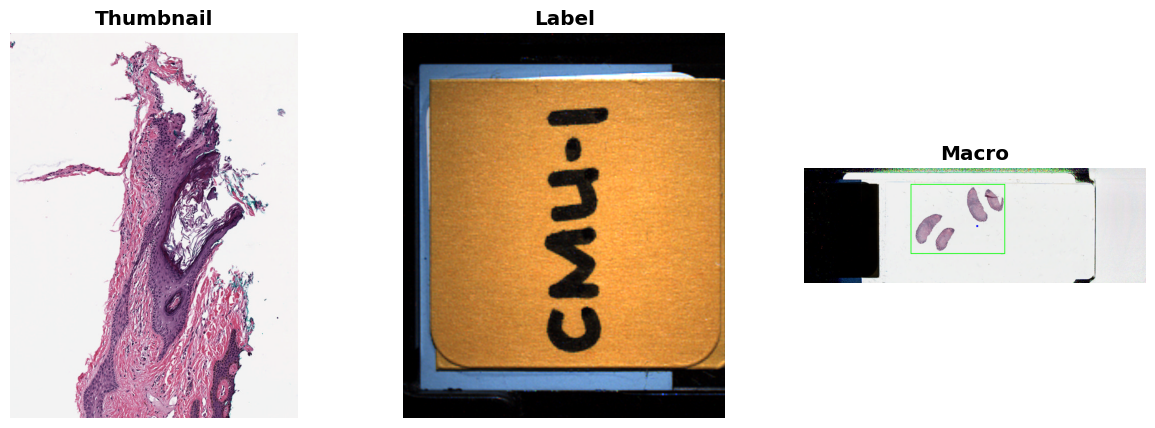

In [9]:
images = []
for name in image_names:
    image = slide.get_aux_image_raster(name)
    images.append(image)

show_images(images,image_names, 500)

## Scenes
A **Scene** object represents a single image within a slide. Certain formats, such as Zeiss czi, can contain multiple images within a single slide. The **num_scenes** property of a **Slide** object returns the number of images in the slide (excluding auxiliary images). The **get_scene** method of the **Slide** object retrieves a **Scene** object based on its index. The **Scene** object provides access to the image raster data. It's important to note that some image formats support multidimensional rasters. The **Scene** object is capable of handling 3 and 4 dimensional images, including time series.

In [10]:
slide.num_scenes

1

In [11]:
scene = slide.get_scene(0)

## Scene properties
<table style="border-collapse: collapse; width: auto; margin-left: 0;">
  <thead>
    <tr>
      <th style="border: 1px solid black; padding: 8px;"><strong>Property</strong></th>
      <th style="border: 1px solid black; padding: 8px;"><strong>Description</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>compression</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Compression method for the scene raster data</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>file_path</strong></td>
      <td style="border: 1px solid black; padding: 8px;">File path to the scene (usually the same as the slide's file path)</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>magnification</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Scanning magnification extracted from the slide metadata</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>name</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Scene name extracted from slide metadata</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>num_aux_images</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Number of auxiliary images of the scene</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>num_channels</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Number of raster channels in the scene</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>num_t_frames</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Number of time frames in the scene</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>num_z_slices</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Number of slices along the Z-axis in the scene</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>origin</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Coordinates of the top-left corner of the scene (tuple: x, y)</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>rect</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Scene rectangle in pixels (tuple: x-origin, y-origin, width, height)</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>resolution</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Scene resolution in meters per pixel (tuple: x-res, y-res)</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>size</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Scene size in pixels (tuple: width, height)</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>t_resolution</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Time distance between two time frames in seconds</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>z_resolution</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Distance between two Z-slices in meters</td>
    </tr>
  </tbody>
</table>


## Scene methods
<table style="border-collapse: collapse; width: auto; margin-left: 0;">
  <thead>
    <tr>
      <th style="border: 1px solid black; padding: 8px;"><strong>Method</strong></th>
      <th style="border: 1px solid black; padding: 8px;"><strong>Description</strong></th>
      <th style="border: 1px solid black; padding: 8px;"><strong>Parameters</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>get_aux_image</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Get auxiliary image as a numpy array</td>
      <td style="border: 1px solid black; padding: 8px;"><ul style="margin: 0;"><li>image_name (str)</li><li>size (tuple: width, height)</li><li>channel_indices (list)</li></ul></td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>get_aux_image_names</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Get list of auxiliary image names</td>
      <td style="border: 1px solid black; padding: 8px;"></td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>get_channel_data_type</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Returns data type for a scene channel by index</td>
      <td style="border: 1px solid black; padding: 8px;">channel index (int)</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>get_channel_name</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Returns name of a scene channel by index</td>
      <td style="border: 1px solid black; padding: 8px;">channel index(int)</td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>get_raw_metadata</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Get raw metadata of the scene</td>
      <td style="border: 1px solid black; padding: 8px;"></td>
    </tr>
    <tr>
      <td style="border: 1px solid black; padding: 8px;"><strong>read_block</strong></td>
      <td style="border: 1px solid black; padding: 8px;">Reads rectangular block of the scene with optional rescaling</td>
      <td style="border: 1px solid black; padding: 8px;"><ul style="margin: 0;"><li>rect (tuple: x, y, width, height)</li><li>size (tuple: width, height)</li><li>channel_indices (list)</li><li>slices (tuple: first, last+1)</li><li>frames (tuple: first, last+1)</li></ul></td>
    </tr>
  </tbody>
</table>


Property **compression** returns compression method usded for pixel data compression in the original slide. The return value is a member of **Compression** enumeration.
<table style="border-collapse: collapse; border: 1px solid black;  width: auto; margin-left: 0;">
  <thead>
    <tr>
      <th style="border: 1px solid black;"><strong>Compression Algorithm</strong></th>
      <th style="border: 1px solid black;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid black;"><strong>Uncompressed</strong></td>
      <td style="border: 1px solid black;">No compression applied to the image data.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>Jpeg</strong></td>
      <td style="border: 1px solid black;">Joint Photographic Experts Group (JPEG) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>JpegXR</strong></td>
      <td style="border: 1px solid black;">JPEG extended range (JPEG-XR) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>Png</strong></td>
      <td style="border: 1px solid black;">Portable Network Graphics (PNG) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>Jpeg2000</strong></td>
      <td style="border: 1px solid black;">JPEG 2000 compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>LZW</strong></td>
      <td style="border: 1px solid black;">Lempel-Ziv-Welch (LZW) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>HuffmanRL</strong></td>
      <td style="border: 1px solid black;">Huffman run-length (HuffmanRL) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>CCITT_T4</strong></td>
      <td style="border: 1px solid black;">CCITT Group 4 (CCITT_T4) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>CCITT_T6</strong></td>
      <td style="border: 1px solid black;">CCITT Group 6 (CCITT_T6) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>JpegOld</strong></td>
      <td style="border: 1px solid black;">Older version of the JPEG compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>Zlib</strong></td>
      <td style="border: 1px solid black;">Zlib compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>JBIG85</strong></td>
      <td style="border: 1px solid black;">JBIG85 compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>JBIG43</strong></td>
      <td style="border: 1px solid black;">JBIG43 compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>NextRLE</strong></td>
      <td style="border: 1px solid black;">Next RLE (NextRLE) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>PackBits</strong></td>
      <td style="border: 1px solid black;">PackBits compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>ThunderScanRLE</strong></td>
      <td style="border: 1px solid black;">ThunderScan run-length encoding (ThunderScanRLE) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>RasterPadding</strong></td>
      <td style="border: 1px solid black;">Raster padding compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>RLE_LW</strong></td>
      <td style="border: 1px solid black;">Run-length encoding with Lempel-Ziv-Welch (RLE_LW) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>RLE_HC</strong></td>
      <td style="border: 1px solid black;">Run-length encoding with Huffman coding (RLE_HC) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>RLE_BL</strong></td>
      <td style="border: 1px solid black;">Run-length encoding with Bit Length (RLE_BL) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>PKZIP</strong></td>
      <td style="border: 1px solid black;">PKZIP compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>KodakDCS</strong></td>
      <td style="border: 1px solid black;">Kodak DCS compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>JBIG</strong></td>
      <td style="border: 1px solid black;">JBIG compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>NikonNEF</strong></td>
      <td style="border: 1px solid black;">Nikon NEF compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>JBIG2</strong></td>
      <td style="border: 1px solid black;">JBIG2 compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>GIF</strong></td>
      <td style="border: 1px solid black;">Graphics Interchange Format (GIF) compression algorithm.</td>
    </tr>
    <tr>
      <td style="border: 1px solid black;"><strong>BIGGIF</strong></td>
      <td style="border: 1px solid black;">Big Graphics Interchange Format (BIGGIF) compression algorithm.</td>
    </tr>
  </tbody>
</table>


In [12]:
scene.compression

<Compression.Jpeg: 2>

The **file_path** property of the **Scene** object returns the path of the scene file. In most cases, this path has the same value as the value returned by **file_path** property of the corresponding **Slide** object.

In [13]:
scene.file_path

'./images/CMU-1-Small-Region.svs'

The property **magnification** returns scanner magnification extracted from the slide metadata. Not all formats support this property. The property **resolution** is related to the magnification and returns a tuple with sizes of a pixel in meters in X and Y directions.

In [14]:
scene.magnification

20.0

In [15]:
scene.resolution

(4.99e-07, 4.99e-07)

For 3D and 4D images resolution in Z direction (size between two slices in meters) and in  time (time between two time frames in seconds) can be obtained with the **z_resolution** and **t_resolution** properties.

In [16]:
scene.z_resolution, scene.t_resolution

(0.0, 0.0)

Some formats provide names for slide images. These names can be accessed by the **name** property of the **Scene** object.

In [17]:
scene.name

'Image'

### Raster parameters
**Scene** object provides access to the pixel data. There are several properties that describe the pixel data configuration:
- **num_channels**: number of channels in the raster;
- **size**: planar size of the raster in pixel;
- **origin**: pixel coordinates of the scene origin in the XY plane;
- **rect**: planar size of the raster in pixel (combination of the scene origin and size);
- **num_z_slices**: number of raster planes (slices) in z direction (for 3D images);
- **num_t_frames**: number of time sequences;
- method **get_channel_data_type**: returns data type of pixel in a channel.

In [18]:
scene.num_channels

3

In [19]:
scene.size

(2220, 2967)

In [20]:
scene.rect

(0, 0, 2220, 2967)

In [21]:
scene.num_z_slices

1

In [22]:
scene.num_t_frames

1

In [23]:
scene.get_channel_data_type(0),scene.get_channel_data_type(1),scene.get_channel_data_type(2)

(dtype('uint8'), dtype('uint8'), dtype('uint8'))

The **Scene** object raster has 2220 pixels width and 2967 pixels height. It has 3 channels, a single z slice an a single time frame. It is a 2D image. Note that the **origin** property returns a tuple (origin x, origin y). Origin coordinates make sense for multi-image slides and contain shift of the scene origin from the slide origin. The **rect** property is a combination of scene origin and size. All channels of the image have data type "8 bit unsigned".

Some slide formats provide names for the channel. It is especialy important for the fluorescent images. **Scene** object provides this infromation trhough **get_chanel_name** method.

In [24]:
path = get_driver_test_images("SCN")[0]
with slideio.open_slide(path,'AUTO') as slide:
    with slide.get_scene(0) as scene:
        for channel in range (scene.num_channels):
            display(f'Channel index: {channel}, Name: "{scene.get_channel_name(channel)}" Type: {scene.get_channel_data_type(channel)}')

'Channel index: 0, Name: "405|Empty" Type: uint8'

'Channel index: 1, Name: "L5|Empty" Type: uint8'

'Channel index: 2, Name: "TX2|Empty" Type: uint8'

## Raster Access

The **read_block** method in the **Scene** class provides access to the pixel data of the scene. It allows reading the entire image or a specific block of the image. The method returns the raster data as an N-dimensional numpy array, where the dimensionality depends on the image dimensions and the parameters provided to the method.

The **read_block** method also allows the selection of specific channels to be included in the returned raster, as well as the subset of z slices and/or time series. Additionally, it provides the option to scale the reading block, if needed.

In the simplest form, without specifying any parameters, the method reads the entire image. It's important to note that images can be very large, and the returned array can consume a significant amount of memory. Therefore, we encourage you to use the **read_block** method without parameters only for small images to avoid memory issues.

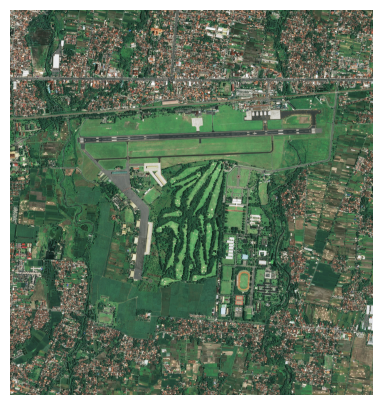

In [25]:
path = get_driver_test_images("GDAL")[0]
slide = slideio.open_slide(path,'AUTO')
scene = slide.get_scene(0)
block = scene.read_block()
show_image(block,500)

In [26]:
block.shape

(5839, 5494, 3)

As you can see the library returned the whole image of size: (width=5839, height=5494, num_channels=3).

The **read_block** method in the **Scene** class allows you to read a rectangular part of the image by specifying the **rect** parameter. This parameter defines the coordinates and dimensions of the block to be read from the scene. By providing the appropriate values for **rect**, you can selectively extract a specific region of interest from the image.

For the demonstration, let us compute a rectangle from a middle of the image above:

In [27]:
image_size = scene.size
rect = (image_size[0]//3,image_size[1]//3,image_size[0]//5,image_size[1]//5)
rect

(1831, 1946, 1098, 1167)

Now we can read the block of the image defined by the rectange:

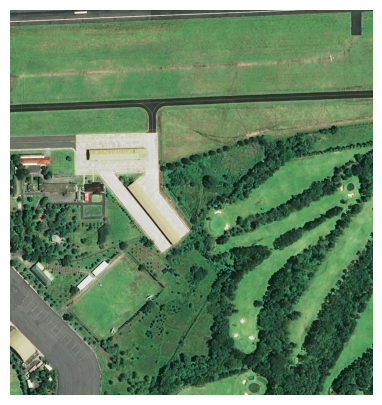

In [28]:
block = scene.read_block(rect)
show_image(block,500)

In [29]:
block.shape

(1167, 1098, 3)

As you can see, the **read_block** method returns a pixel block with the required parameters. 

In many cases, it is necessary to perform image rescaling. This can be achieved by supplying the **size** parameter to the method. By specifying the desired size, you can scale the image block accordingly during the reading process. This allows you to obtain the pixel data in a resized format as per your specific requirements.

In [30]:
size = (rect[2]//3, rect[3]//3)
block = scene.read_block(rect, size)
block.shape

(389, 366, 3)

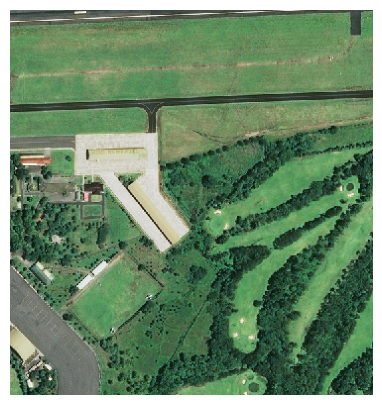

In [31]:
show_image(block,500)

Note that if the **size** parameters are not calculated correctly, the resulting block may be distorted. It is important to ensure that the scaling factors for both the X and Y directions are applied appropriately to maintain the aspect ratio of the image. In the example below, we demonstrate a scenario where the block is rescaled twice as much in the X direction compared to the Y direction, resulting in image distortion. To avoid such distortion, it is essential to calculate the size parameters accurately and maintain the proportional scaling of the image block.

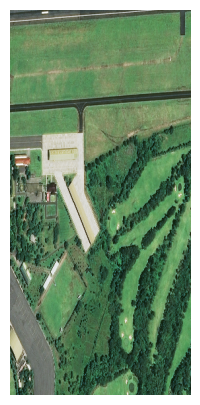

In [32]:
size = (rect[2]//4, rect[3]//2)
block = scene.read_block(rect, size)
show_image(block,500)

In [33]:
block.shape

(583, 274, 3)

Another way to avoid image distortion when rescaling is to specify only one parameter in the **size** tuple (either width or height) and set the other parameter to 0. By doing so, the library will automatically calculate the missing parameter to maintain the aspect ratio of the image. This ensures that the image is scaled proportionally without any distortion. Using this approach, you can easily resize the image while preserving its original aspect ratio.

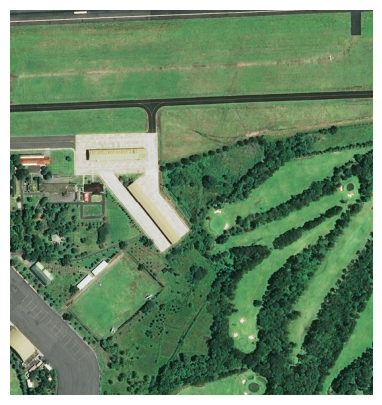

In [34]:
size = (0, rect[3]//2)
block = scene.read_block(rect, size)
show_image(block,500)

If you want to read and rescale the whole image, you can skipp the **rect** parameter.

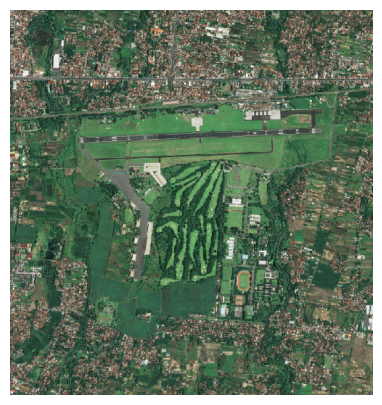

In [35]:
size = (500, 0)
block = scene.read_block(size=size)
show_image(block,500)

In [36]:
block.shape

(531, 500, 3)

Sometimes, when working with images, you may only need to access a subset of channels. In such cases, you can use the **channel_indices** parameter of the method. By providing a list of channel indices, you can specify which channels should be included in the output raster. This allows you to selectively retrieve and work with specific channels of interest, while excluding others.

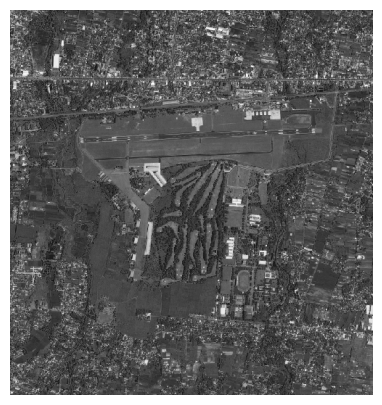

In [37]:
size = (500, 0)
block = scene.read_block(size=size, channel_indices=[2])
show_image(block,500)

In [38]:
block.shape

(531, 500)

## Multidimensional images
The **slices** and **frames** parameters are specifically designed for working with 3D and 4D images. They allow you to specify subsets of slices along the Z-axis and time frames, respectively. Each parameter is represented as a tuple. The first value of the tuple indicates the index of the first slice or frame to be included, while the second value represents the number of slices or frames to be included in the output raster.

These parameters are particularly useful when dealing with multidimensional images where you want to extract specific sections or time points of interest. For more detailed information and practical examples on working with multidimensional images, you can refer to the notebook that covers this topic.

## Scene Auxiliary Images

In some multi-image slide formats, each image of the slide may have associated auxiliary images. These auxiliary images can be accessed through the **Scene** class using the methods **get_aux_image_names** and **get_aux_image**. The usage of these methods is similar to the corresponding methods in the **Slide** object.

The **get_aux_image_names** method returns a list of auxiliary image names available for the scene. You can use this method to retrieve the names of the auxiliary images associated with the scene.

The **get_aux_image** method allows you to obtain a specific auxiliary image from the scene by providing the image name as a parameter. This method returns the auxiliary image as a numpy array, which you can further manipulate or analyze as needed.

By utilizing these methods, you can effectively work with the auxiliary images associated with each image of a multi-image slide in your analysis or processing workflows.

## Scene Metadata

In some multi-image slides, each image may contain metadata specific to that image. For example, let's consider extracting metadata from a DICOM image. The extracted metadata is returned in the form of a JSON document.

By accessing the metadata of a scene, you can gain valuable information about the image, such as patient information, acquisition details, image properties, and more. The metadata can provide context and additional insights into the image and its associated data.

The extracted metadata, in the JSON format, can be further processed, analyzed, or utilized in your application or research workflows. It allows you to leverage the rich information embedded within the image and make informed decisions or perform specific actions based on the extracted metadata.

By utilizing the scene metadata, you can unlock the potential of the multi-image slides and enhance your analysis or application capabilities.

For detailed information for different slide formats refer to the notebook that covers the format.

In [39]:
path = get_driver_test_images("DCM")[0]
slide = slideio.open_slide(path,'AUTO')
scene = slide.get_scene(0)
raw_metadata = scene.get_raw_metadata()
metadata = json.loads(raw_metadata)
metadata

{'00080008': {'vr': 'CS', 'Value': ['ORIGINAL', 'PRIMARY']},
 '00080016': {'vr': 'UI', 'Value': ['1.2.840.10008.5.1.4.1.1.4']},
 '00080018': {'vr': 'UI', 'Value': ['999.999.2.19960619.163000.1.103']},
 '00080020': {'vr': 'DA', 'Value': ['1995.06.26']},
 '00080023': {'vr': 'DA', 'Value': ['1995.06.26']},
 '00080030': {'vr': 'TM', 'Value': ['11:20:00']},
 '00080060': {'vr': 'CS', 'Value': ['MR']},
 '00080070': {'vr': 'LO', 'Value': ['Philips']},
 '00080080': {'vr': 'LO', 'Value': ['Community Hospital']},
 '00080081': {'vr': 'ST', 'Value': ['Anytown']},
 '00080090': {'vr': 'PN', 'Value': [{'Alphabetic': 'Anonymized'}]},
 '00081030': {'vr': 'LO', 'Value': ['MRI']},
 '00100010': {'vr': 'PN', 'Value': [{'Alphabetic': 'Anonymized'}]},
 '00180050': {'vr': 'DS', 'Value': [10.0]},
 '00180080': {'vr': 'DS', 'Value': [1333.33]},
 '00180081': {'vr': 'DS', 'Value': [11.98]},
 '00180089': {'vr': 'IS', 'Value': [16]},
 '00181063': {'vr': 'DS', 'Value': [69.47]},
 '00181149': {'vr': 'IS', 'Value': [350